In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sn

## Part 1 (a): Train.csv切成Training set和Testing set，並且normalize

In [2]:
def data_preprocess():
    select_columns = ['school','sex','age','famsize','studytime','failures','activities','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G3']
    df = pd.read_csv('train.csv')
    df = df[select_columns]
    df = pd.get_dummies(df)
    #divide into train and test dataframe
    train_df = df.sample(frac=0.8)
    test_df = df.drop(train_df.index)
    train_df = train_df.reset_index()
    test_df = test_df.reset_index()
    train_G3 = train_df[['G3']]
    test_G3 = test_df[['G3']]
    train_df = train_df.drop(columns=['index', 'G3'])
    test_df = test_df.drop(columns=['index', 'G3'])

    #normalize
    train_df = (train_df-train_df.mean())/train_df.std()
    test_df = (test_df-test_df.mean())/test_df.std()
    train_df = train_df.values
    test_df = test_df.values
    return train_G3, test_G3, train_df, test_df

## Part1 (b): Linear Regression with Pseudo-inverse

In [3]:
def LR_pseudo_inverse(train_df, test_df, train_G3, test_G3):
    A_transpose = np.transpose(train_df)
    AA_inverse = np.linalg.pinv(np.matmul(np.transpose(train_df), train_df))

    #X is weight
    X = np.matmul(np.matmul(AA_inverse, A_transpose), train_G3)
    LR_predict_G3 = np.matmul(test_df, X)
    LR_RMSE = float((np.sum((LR_predict_G3-test_G3)**2)/len(test_G3))**(1/2))
    print("Linear Regression with Pseudo-inverse\nRMSE: "+str(LR_RMSE)+'\n')
    return LR_predict_G3, LR_RMSE

## Part1 (c): Linear Regression with regularization λ = 1.0

In [4]:
def LR_reg(train_df, test_df, train_G3, test_G3):
    lamb = 1
    A_transpose = np.transpose(train_df)

    AA_lambda_inverse = np.linalg.pinv((np.matmul(np.transpose(train_df), train_df) + (lamb*np.identity(train_df.shape[1]))))
    #X is weight
    X = np.matmul(np.matmul(AA_lambda_inverse, A_transpose), train_G3)

    LR_reg_predict_G3 = np.matmul(test_df, X)
    LR_reg_RMSE = float((np.sum((LR_reg_predict_G3-test_G3)**2)/len(test_G3))**(1/2))
    print("Linear Regression with regularization λ = 1.0\nRMSE: "+str(LR_reg_RMSE)+'\n')
    return LR_reg_predict_G3, LR_reg_RMSE

## Part1 (d): Linear Regression with regularization λ = 1.0 and bias term

In [5]:
def LR_reg_bias(train_df, test_df, train_G3, test_G3):
    lamb = 1
    A = np.insert(train_df, 0, np.ones((1, train_df.shape[0])), axis=1)
    A_transpose = np.transpose(A)
    identity_bias = np.identity(train_df.shape[1]+1)
    identity_bias[:,0] = 0

    AA_lambda_inverse = np.linalg.pinv(np.matmul(A_transpose, A) + (lamb*identity_bias))

    #X is weight
    X = np.matmul(np.matmul(AA_lambda_inverse, A_transpose), train_G3)

    LR_reg_bias_predict_G3 = np.matmul(np.insert(test_df, 0, np.ones((1, test_df.shape[0])), axis=1), X)
    LR_reg_bias_RMSE = float((np.sum((LR_reg_bias_predict_G3-test_G3)**2)/len(test_G3))**(1/2))
    print("Linear Regression with regularization λ = 1.0 and bias term\nRMSE: "+str(LR_reg_bias_RMSE)+'\n')
    return LR_reg_bias_predict_G3, LR_reg_bias_RMSE, X

## Part1 (f): Plot the ground truth (G3) versus all predicted values

In [6]:
def plot_result(test_G3, LR_predict_G3, LR_reg_predict_G3, LR_reg_bias_predict_G3, LR_RMSE, LR_reg_RMSE, LR_reg_bias_RMSE ):
    plt.plot(np.arange(0,200) ,test_G3, "b", label="Ground Truth")
    plt.plot(np.arange(0,200) ,LR_predict_G3, "y", label="("+str(round(LR_RMSE, 2))+")"+" Linear Regression")
    plt.plot(np.arange(0,200) ,LR_reg_predict_G3, "g", label="("+str(round(LR_reg_RMSE, 2))+")"+" Linear Regression (reg)")
    plt.plot(np.arange(0,200) ,LR_reg_bias_predict_G3, "r", label="("+str(round(LR_reg_bias_RMSE, 2))+")"+" Linear Regression(r/b)")
    plt.ylim(-15,20)
    plt.ylabel("Value")
    plt.xlabel("Sample index")
    plt.title("Regression result comparision")

    plt.grid()
    plt.legend(loc =4)
    plt.show()

## Part2 (a)

In [7]:
def LR_reg_bias_part2():

    select_columns = ['school','sex','age','famsize','studytime','failures','activities','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G3']
    df = pd.read_csv('train.csv')
    df = df[select_columns]
    df = pd.get_dummies(df)
    
    #divide into train and test dataframe
    train_df = df.sample(frac=0.8)
    test_df = df.drop(train_df.index)
    train_df = train_df.reset_index()
    test_df = test_df.reset_index()

    train_df.insert(loc=train_df.shape[1], column='G3_c', value=0)
    test_df.insert(loc=test_df.shape[1], column='G3_c', value=0)

    train_df.loc[train_df['G3'] >= 10, 'G3_c'] = 1
    test_df.loc[test_df['G3'] >= 10, 'G3_c'] = 1
    train_G3_c = train_df['G3_c']
    test_G3_c = test_df['G3_c']
    test_G3 = test_df['G3']
    train_df = train_df.drop(columns=['index', 'G3', 'G3_c'])
    test_df = test_df.drop(columns=['index', 'G3', 'G3_c'])

    #normalize
    train_df = (train_df-train_df.mean())/train_df.std()
    test_df = (test_df-test_df.mean())/test_df.std()
    train_df = train_df.values
    test_df = test_df.values
    
    lamb = 1
    A = np.insert(train_df, 0, np.ones((1, train_df.shape[0])), axis=1)
    A_transpose = np.transpose(A)
    identity_bias = np.identity(train_df.shape[1]+1)
    identity_bias[:,0] = 0

    AA_lambda_inverse = np.linalg.pinv(np.matmul(A_transpose, A) + (lamb*identity_bias))

    #X is weight
    X = np.matmul(np.matmul(AA_lambda_inverse, A_transpose), train_G3_c)

    LR_reg_bias_predict_G3 = np.matmul(np.insert(test_df, 0, np.ones((1, test_df.shape[0])), axis=1), X)
    
    LR_reg_bias_RMSE = float((np.sum((LR_reg_bias_predict_G3-test_G3_c)**2)/len(test_G3_c))**(1/2))
    print("Linear Regression with regularization λ = 1.0 and bias term\nRMSE: "+str(LR_reg_bias_RMSE)+'\n')
    LR_reg_bias_predict_G3_09 = np.zeros(200)
    LR_reg_bias_predict_G3_05 = np.zeros(200)
    LR_reg_bias_predict_G3_01 = np.zeros(200)
    LR_reg_bias_predict_G3_09[:][LR_reg_bias_predict_G3[:] < 0.9] = 0
    LR_reg_bias_predict_G3_09[:][LR_reg_bias_predict_G3[:] > 0.9] = 1
    LR_reg_bias_predict_G3_05[:][LR_reg_bias_predict_G3[:] < 0.5] = 0
    LR_reg_bias_predict_G3_05[:][LR_reg_bias_predict_G3[:] > 0.5] = 1
    LR_reg_bias_predict_G3_01[:][LR_reg_bias_predict_G3[:] < 0.1] = 0
    LR_reg_bias_predict_G3_01[:][LR_reg_bias_predict_G3[:] > 0.1] = 1
    d = {'True_G3':test_G3,'True_G3_c':test_G3_c , 'predict_G3_0.9':LR_reg_bias_predict_G3_09, 'predict_G3_0.5':LR_reg_bias_predict_G3_05,'predict_G3_0.1':LR_reg_bias_predict_G3_01}
    result_df = pd.DataFrame(data=d)
    print(result_df)

    LR_reg_bias_RMSE = float((np.sum((LR_reg_bias_predict_G3-test_G3_c)**2)/len(test_G3_c))**(1/2))
    print("Linear Regression with regularization λ = 1.0 and bias term\nRMSE: "+str(LR_reg_bias_RMSE)+'\n')
    
    return result_df

## Part2 (b): logistic regression with gradient descent

In [8]:
def cost_func(X, y, theta):
    sigmoid_v = np.vectorize(sigmoid)
    #log_v = np.vectorize(math.log)
    sigmoid_term = sigmoid_v(np.matmul(X,theta.T))
    log_term = np.log2(sigmoid_term)
    log_term2 = np.log2(np.ones(sigmoid_term.shape[0])-sigmoid_term)
    cost = np.matmul(-y, log_term) - np.matmul(np.ones(y.shape[0])-y, log_term2)

    return float(cost)

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def gradientDescent(X, y, lr, iters):
    lamb = 0
    parameter = X.shape[1]
    theta = np.ones(X.shape[1])
    sigmoid_v = np.vectorize(sigmoid)
    cost = []
    current_iter = 0
    for i in range(iters):
        current_iter += 1
        error = sigmoid_v(np.matmul(X,theta.T)) - y
        for j in range(parameter):
            if j==0:
                theta[j] = theta[j] - (lr/X.shape[0])*np.sum(np.matmul(error, X[:,j]))
            else:
                theta[j] = theta[j] - (lr/X.shape[0])*(np.sum(np.matmul(error, X[:,j])) + lamb*theta[j])
        cost.append(cost_func(X, y, theta))
        if len(cost) > 1:
            if (cost[-2] - cost[-1]) <  0.00000000001:
                print('early stop, '+str(current_iter)+' iters')
                break;
    print('cost: '+str(cost[-1]))
    return cost, theta


In [11]:
def logistic_R():
    sigmoid_v = np.vectorize(sigmoid)
    select_columns = ['school','sex','age','famsize','studytime','failures','activities','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G3']
    df = pd.read_csv('train.csv')
    df = df[select_columns]
    df = pd.get_dummies(df)

    #divide into train and test dataframe
    train_df = df.sample(frac=0.8)
    test_df = df.drop(train_df.index)
    train_df = train_df.reset_index()
    test_df = test_df.reset_index()

    train_df.insert(loc=train_df.shape[1], column='G3_c', value=0)
    test_df.insert(loc=test_df.shape[1], column='G3_c', value=0)

    train_df.loc[train_df['G3'] >= 10, 'G3_c'] = 1
    test_df.loc[test_df['G3'] >= 10, 'G3_c'] = 1
    train_G3_c = train_df['G3_c']
    test_G3_c = test_df['G3_c']
    test_G3 = test_df['G3']
    train_df = train_df.drop(columns=['index', 'G3', 'G3_c'])
    test_df = test_df.drop(columns=['index', 'G3', 'G3_c'])

    #normalize
    train_df = (train_df-train_df.mean())/train_df.std()
    test_df = (test_df-test_df.mean())/test_df.std()
    train_df = train_df.values
    test_df = test_df.values
    X = np.insert(train_df, 0, np.ones((1, train_df.shape[0])), axis=1)
    #print(train_G3_c.shape)
    cost, theta = gradientDescent(X, train_G3_c, 0.1, 4000)
    logistic_R_predict_G3 = np.matmul(np.insert(test_df, 0, np.ones((1, test_df.shape[0])), axis=1), theta)
    logistic_R_predict_G3 = sigmoid_v(logistic_R_predict_G3)
    
    #plt.ylabel("Cost")
    #plt.xlabel("Epoch")
    #plt.plot(np.arange(len(cost)) ,cost, "b")
    #plt.show()
    logistic_R_RMSE = float((np.sum((logistic_R_predict_G3-test_G3_c)**2)/len(test_G3_c))**(1/2))
    print("Logistic Regression with regularization λ = 1.0 and bias term\nRMSE: "+str(logistic_R_RMSE)+'\n')
    logistic_R_predict_G3_09 = np.zeros(200)
    logistic_R_predict_G3_05 = np.zeros(200)
    logistic_R_predict_G3_01 = np.zeros(200)
    logistic_R_predict_G3_09[:][logistic_R_predict_G3[:] < 0.9] = 0
    logistic_R_predict_G3_09[:][logistic_R_predict_G3[:] > 0.9] = 1
    logistic_R_predict_G3_05[:][logistic_R_predict_G3[:] < 0.5] = 0
    logistic_R_predict_G3_05[:][logistic_R_predict_G3[:] > 0.5] = 1
    logistic_R_predict_G3_01[:][logistic_R_predict_G3[:] < 0.1] = 0
    logistic_R_predict_G3_01[:][logistic_R_predict_G3[:] > 0.1] = 1
    d = {'True_G3':test_G3,'True_G3_c':test_G3_c , 'predict_G3_0.9':logistic_R_predict_G3_09, 'predict_G3_0.5':logistic_R_predict_G3_05,'predict_G3_0.1':logistic_R_predict_G3_01}
    result_df = pd.DataFrame(data=d)
    print(result_df)
    
    return result_df, theta

## Part2 (c)(d): plot confusion matrics for (a) and (b)

In [12]:
def plot_confusion(LR_part2_df, logistic_df, threshold):
    TP_LR = 0
    TN_LR = 0
    FP_LR = 0
    FN_LR = 0
    for i in range(LR_part2_df.shape[0]):
        if LR_part2_df['True_G3_c'][i] == LR_part2_df['predict_G3_'+str(threshold)][i]:
            if LR_part2_df['predict_G3_'+str(threshold)][i] == 1:
                TP_LR += 1
            elif LR_part2_df['predict_G3_'+str(threshold)][i] == 0:
                TN_LR += 1
        elif LR_part2_df['True_G3_c'][i] != LR_part2_df['predict_G3_'+str(threshold)][i]:
            if LR_part2_df['predict_G3_'+str(threshold)][i] == 1:
                FP_LR += 1
            elif LR_part2_df['predict_G3_'+str(threshold)][i] == 0:
                FN_LR += 1
    print('Accuracy for LR with regular and bias term(threshold='+str(threshold)+'):'+ str((TP_LR+TN_LR)/(TP_LR+FP_LR+FN_LR+TN_LR)))
    print('Precision for LR with regular and bias term(threshold='+str(threshold)+'):'+ str(TP_LR/(TP_LR+FP_LR)))
    
    TP_log = 0
    TN_log = 0
    FP_log = 0
    FN_log = 0
    for i in range(logistic_df.shape[0]):
        if logistic_df['True_G3_c'][i] == logistic_df['predict_G3_'+str(threshold)][i]:
            if logistic_df['predict_G3_'+str(threshold)][i] == 1:
                TP_log += 1
            elif logistic_df['predict_G3_'+str(threshold)][i] == 0:
                TN_log += 1
        elif logistic_df['True_G3_c'][i] !=logistic_df['predict_G3_'+str(threshold)][i]:
            if logistic_df['predict_G3_'+str(threshold)][i] == 1:
                FP_log += 1
            elif logistic_df['predict_G3_'+str(threshold)][i] == 0:
                FN_log += 1
    print('Accuracy for Log Regression with regular and bias term(threshold='+str(threshold)+'):'+str((TP_log+TN_log)/(TP_log+FP_log+FN_log+TN_log)))
    print('Precision for Log Regression with regular and bias term(threshold='+str(threshold)+'):'+str(TP_log/(TP_log+FP_log)))
    
    array_LR = [[TN_LR,FN_LR],[FP_LR,TP_LR]]
    array_log = [[TN_log,FN_log],[FP_log,TP_log]]
    df_LR = pd.DataFrame(array_LR, index = ['predict = 0','predict =1'], columns=['true = 0','true = 1'])
    df_log = pd.DataFrame(array_log, index = ['predict = 0','predict =1'], columns=['true = 0','true = 1'])
    fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    sn.heatmap(df_LR, annot=True, ax =ax1, fmt='g')
    sn.heatmap(df_log, annot=True , ax=ax2, fmt='g')

## Part3 (a): Hidden test set

In [13]:
def part3_a(X):
    select_columns = ['ID','school','sex','age','famsize','studytime','failures','activities','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences']
    df = pd.read_csv('test_no_G3.csv')
    df = df[select_columns]
    ID = df[['ID']]
    df = df.drop(columns=['ID'])
    df = pd.get_dummies(df)
    df = (df-df.mean())/df.std()
    df = df.values
    part3_a_predict_G3 = np.matmul(np.insert(df, 0, np.ones((1, df.shape[0])), axis=1), X)
    ID.insert(loc=1, column='predict G3', value=part3_a_predict_G3)
    return ID

## Part3 (b): Hidden test set

In [14]:
def part3_b(X):
    sigmoid_v = np.vectorize(sigmoid)
    select_columns = ['ID','school','sex','age','famsize','studytime','failures','activities','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences']
    df = pd.read_csv('test_no_G3.csv')
    df = df[select_columns]
    ID = df[['ID']]
    df = df.drop(columns=['ID'])
    df = pd.get_dummies(df)
    df = (df-df.mean())/df.std()
    df = df.values
    part3_b_predict_G3 = np.matmul(np.insert(df, 0, np.ones((1, df.shape[0])), axis=1), X)
    part3_b_predict_G3= sigmoid_v(part3_b_predict_G3)
    part3_b_predict_G3_05 = np.zeros(part3_b_predict_G3.shape[0])
    part3_b_predict_G3_05[:][part3_b_predict_G3[:] < 0.5] = 0
    part3_b_predict_G3_05[:][part3_b_predict_G3[:] > 0.5] = 1
    ID.insert(loc=1, column='predict G3', value=part3_b_predict_G3_05)
    return ID

## Main Function

===================== Part1 (a) =======================

===================== Part1 (b) =======================

Linear Regression with Pseudo-inverse
RMSE: 11.38324114892024

===================== Part1 (c) =======================

Linear Regression with regularization λ = 1.0
RMSE: 11.383223762731067

===================== Part1 (d) =======================

Linear Regression with regularization λ = 1.0 and bias term
RMSE: 3.8904334327815806

===================== Part1 (f) =======================



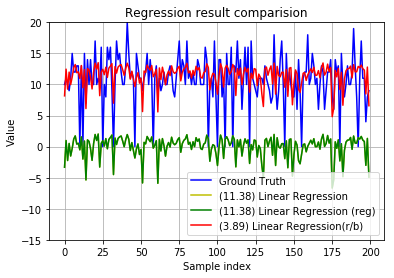

===================== Part2 (a) =======================

Linear Regression with regularization λ = 1.0 and bias term
RMSE: 0.3665256445356917

     True_G3  True_G3_c  predict_G3_0.1  predict_G3_0.5  predict_G3_0.9
0         18          1             1.0             1.0             0.0
1          8          0             1.0             1.0             0.0
2         13          1             1.0             1.0             0.0
3         11          1             1.0             1.0             0.0
4         15          1             1.0             1.0             0.0
5         14          1             1.0             1.0             1.0
6         16          1             1.0             1.0             1.0
7         14          1             1.0             1.0             0.0
8         13          1             1.0             1.0             0.0
9         12          1             1.0             1.0             1.0
10        13          1             1.0             1.0          

Accuracy for LR with regular and bias term(threshold=0.5):0.825
Precision for LR with regular and bias term(threshold=0.5):0.8315217391304348
Accuracy for Log Regression with regular and bias term(threshold=0.5):0.8
Precision for Log Regression with regular and bias term(threshold=0.5):0.827027027027027
===================== Part2 (d) =======================

Accuracy for LR with regular and bias term(threshold=0.9):0.355
Precision for LR with regular and bias term(threshold=0.9):0.9117647058823529
Accuracy for Log Regression with regular and bias term(threshold=0.9):0.28
Precision for Log Regression with regular and bias term(threshold=0.9):0.8695652173913043
===================== Part3 (a) =======================

=================== end of part2 =====================


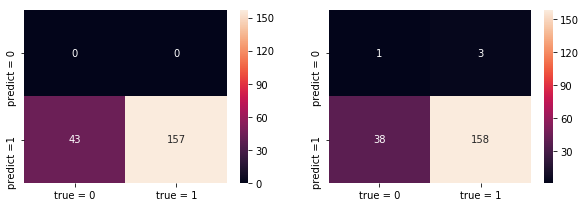

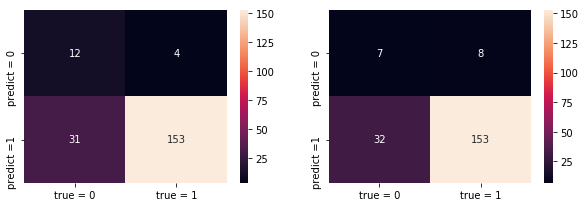

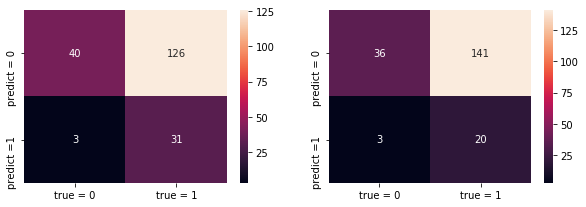

In [15]:
print("===================== Part1 (a) =======================\n")
train_G3, test_G3, train_df, test_df = data_preprocess()

print("===================== Part1 (b) =======================\n")
LR_predict_G3, LR_RMSE = LR_pseudo_inverse(train_df, test_df, train_G3, test_G3)

print("===================== Part1 (c) =======================\n")
LR_reg_predict_G3, LR_reg_RMSE = LR_reg(train_df, test_df, train_G3, test_G3)

print("===================== Part1 (d) =======================\n")
LR_reg_bias_predict_G3, LR_reg_bias_RMSE, weight_part1_d = LR_reg_bias(train_df, test_df, train_G3, test_G3)

print("===================== Part1 (f) =======================\n")
plot_result(test_G3, LR_predict_G3, LR_reg_predict_G3, LR_reg_bias_predict_G3, LR_RMSE, LR_reg_RMSE, LR_reg_bias_RMSE)

print("===================== Part2 (a) =======================\n")
LR_part2_df = LR_reg_bias_part2()

print("===================== Part2 (b) =======================\n")
logistic_df, weight_part2_b = logistic_R()

print("===================== Part2 (c) =======================\n")
plot_confusion(LR_part2_df, logistic_df, 0.1)
plot_confusion(LR_part2_df, logistic_df, 0.5)

print("===================== Part2 (d) =======================\n")
plot_confusion(LR_part2_df, logistic_df, 0.9)

print("===================== Part3 (a) =======================\n")
result_part3_a = part3_a(weight_part1_d)
f = open("107062650_1.txt", "w")
f.write(str(result_part3_a))
f.close()
print("=================== end of part2 =====================")
result_part3_b = part3_b(weight_part2_b)
f = open("107062650_2.txt", "w")
f.write(str(result_part3_b))
f.close()
